#### 定義

In [107]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from   matplotlib import pyplot as plt

In [108]:
CODE_PATH = os.getcwd()
BASE_PATH =  os.path.dirname(CODE_PATH) + '/'
print(BASE_PATH)
DATA_PATH = BASE_PATH + 'data/'

/home/masa1357/Dockerdata/gitfile/signate_LiverDiseaseDetermination/


#### データ読み込み

In [109]:
train = pd.read_csv(DATA_PATH + 'train.csv')
test = pd.read_csv(DATA_PATH + 'test.csv')
df = pd.concat([train.drop(['disease'],axis=1), test], axis=0, sort=False)
df.head(3)

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio
0,59,Male,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802
1,69,Male,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346
2,65,Male,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952


欠損値の確認

In [110]:
df.isnull().sum()

Age         0
Gender      0
T_Bil       0
D_Bil       0
ALP         0
ALT_GPT     0
AST_GOT     0
TP          0
Alb         0
AG_ratio    0
dtype: int64

map

In [111]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
train['Gender'] = train['Gender'].map({'Male': 0, 'Female': 1})
df.head(1)

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio
0,59,0,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802


#### 分析

1.histgram

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'T_Bil'}>],
       [<Axes: title={'center': 'D_Bil'}>,
        <Axes: title={'center': 'ALP'}>,
        <Axes: title={'center': 'ALT_GPT'}>],
       [<Axes: title={'center': 'AST_GOT'}>,
        <Axes: title={'center': 'TP'}>, <Axes: title={'center': 'Alb'}>],
       [<Axes: title={'center': 'AG_ratio'}>, <Axes: >, <Axes: >]],
      dtype=object)

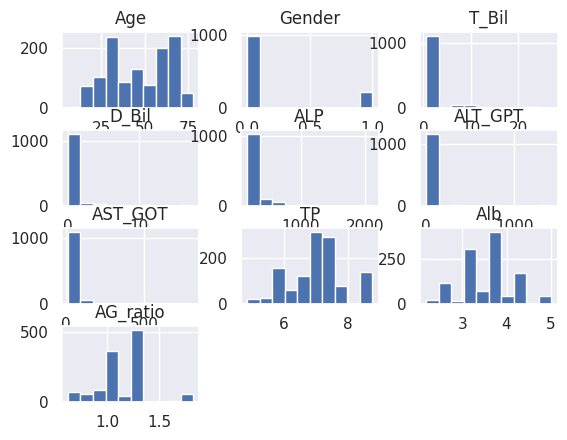

In [112]:
df.hist()

2.heatmap

<Axes: >

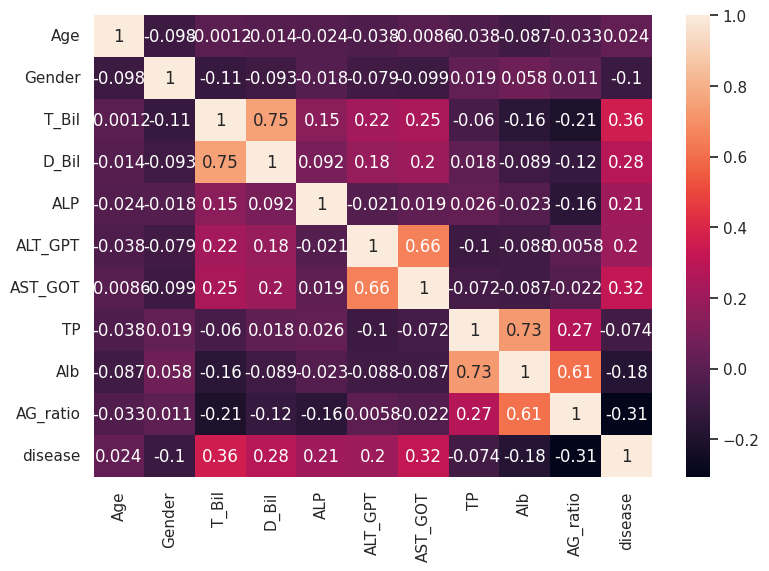

In [113]:
sns.set(style='darkgrid')
plt.figure(figsize=(9,6))
sns.heatmap(train.corr(), annot=True)

<p>考察</p>
Age,Gender,TPが低相関→消そう

3.

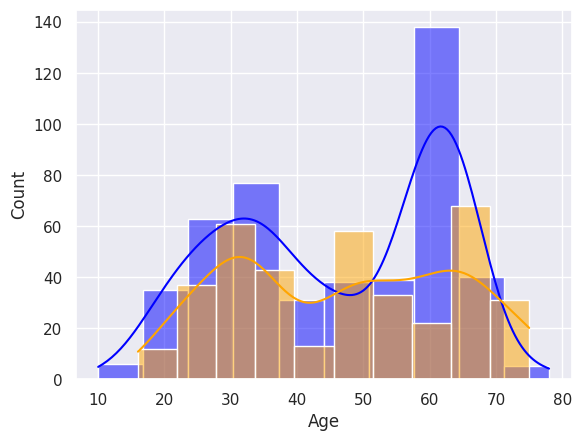

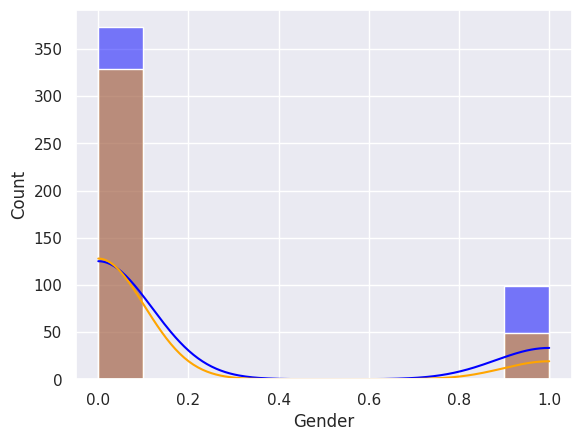

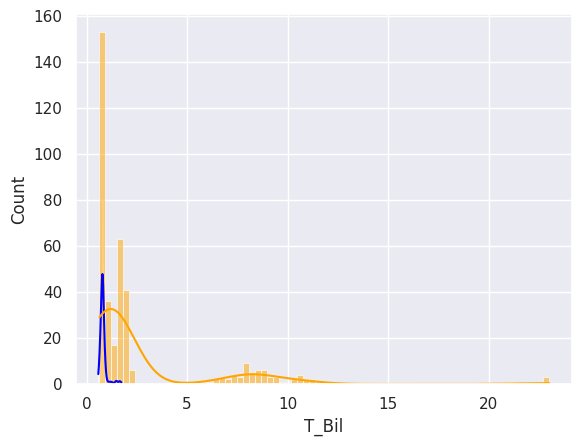

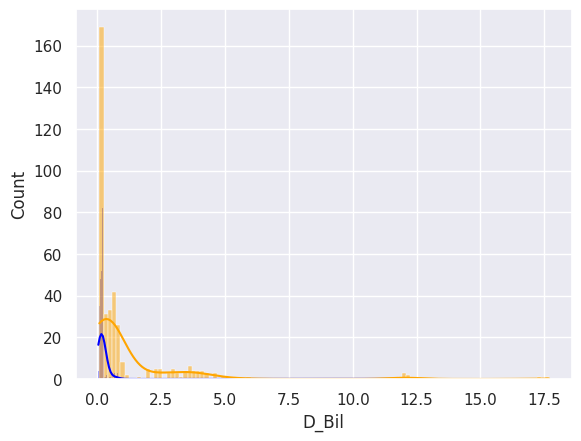

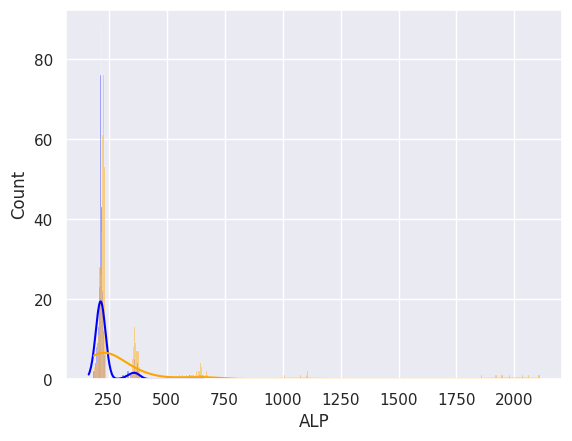

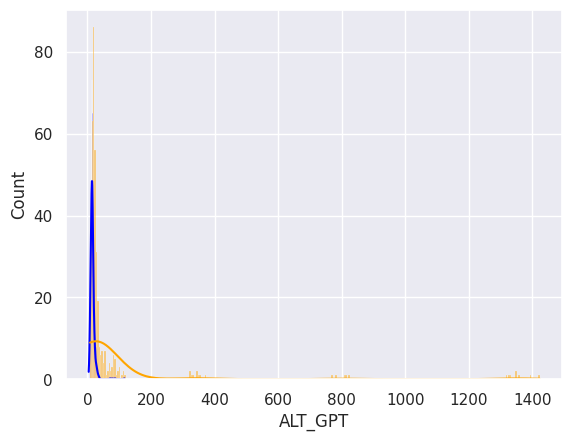

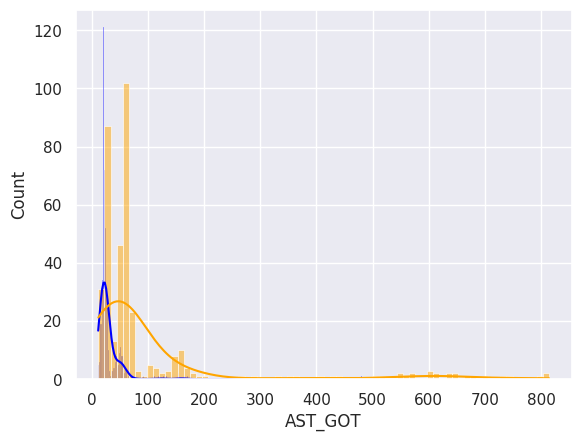

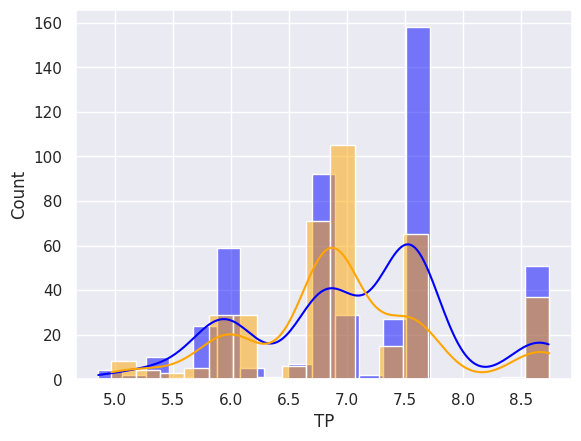

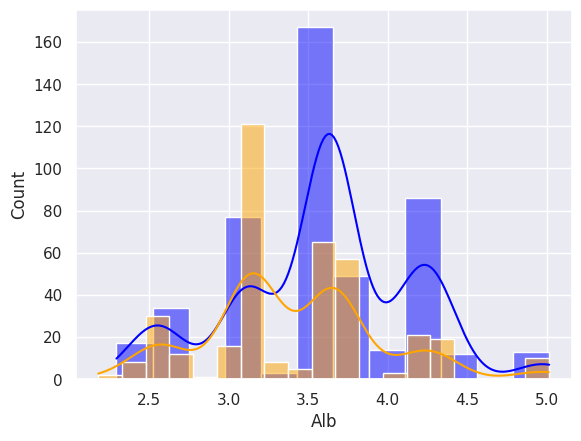

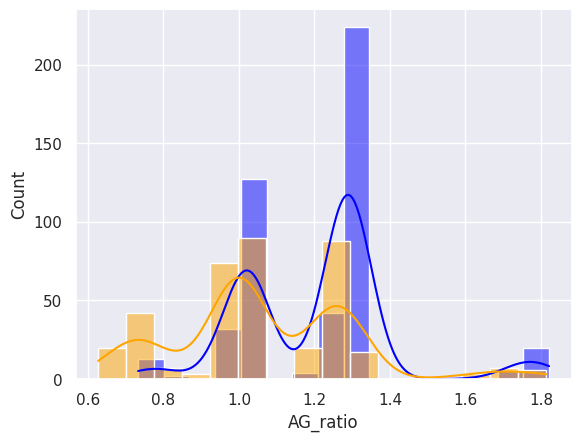

In [114]:
 #列名をリスト化して 
prods = train.columns.tolist()
prods
 #疾患のありなしで確認する 。
for n in range(0,10):
    disease_0= train.query("disease== 0")[prods[n]]
    disease_1 = train.query("disease== 1")[prods[n]]
    sns.histplot(disease_0, kde=True, label='Disease=0', color='blue', alpha=0.5)
    sns.histplot(disease_1, kde=True, label='Disease=1', color='orange', alpha=0.5)
    plt.show()

<p>考察</p>
AST_GotやT_Bill，D_Billがけっこう見やすい

#### データ変換
ダミー変数を作成
D_Billを区間ごとに分割し，判断指標とする

In [115]:
 #bining区切りをつける 。
# 上記から
bins_D_Bil = [0, 0.5, 1,1.5, 2]
# T_Bil列を分割し、0始まりの連番でラベル化した結果を、X_cutに格納する
X_cut, bin_indice = pd.cut(df["D_Bil"], bins=bins_D_Bil, retbins=True, labels=False)
# bin分割した結果をダミー変数化 (prefix=X_Cut.nameは、列名の接頭語を指定している)
X_dummies = pd.get_dummies(X_cut, prefix=X_cut.name)
# 元の説明変数のデータフレーム(X)と、ダミー変数化の結果(X_dummies)を横連結
df = pd.concat([df, X_dummies], axis=1)

出力

In [116]:
df = df.drop([
    'Age',
    'Gender',
    'TP'
    ],axis=1)
df.head(3)

,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,Alb,AG_ratio,D_Bil_0.0,D_Bil_1.0,D_Bil_2.0,D_Bil_3.0
0,0.786886,0.150498,220.178691,13.467617,21.729246,3.112276,1.006802,True,False,False,False
1,1.003987,0.195625,221.218413,51.033462,64.752323,3.051521,0.751346,True,False,False,False
2,0.657140,0.081287,320.770533,12.625011,30.613180,2.489167,0.774952,True,False,False,False


In [117]:
nrow, ncol = train.shape
print(nrow, ncol)

850 11


In [118]:
train_df = df[:nrow].join(train['disease'])
train_df.head(3)

,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,Alb,AG_ratio,D_Bil_0.0,D_Bil_1.0,D_Bil_2.0,D_Bil_3.0,disease
0,0.786886,0.150498,220.178691,13.467617,21.729246,3.112276,1.006802,True,False,False,False,0
1,1.003987,0.195625,221.218413,51.033462,64.752323,3.051521,0.751346,True,False,False,False,1
2,0.657140,0.081287,320.770533,12.625011,30.613180,2.489167,0.774952,True,False,False,False,0


In [119]:
test_df = df[nrow:]
test_df.head(3)

,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,Alb,AG_ratio,D_Bil_0.0,D_Bil_1.0,D_Bil_2.0,D_Bil_3.0
0,0.801797,0.186800,214.448679,15.260516,19.496649,3.600752,1.288006,True,False,False,False
1,0.834857,0.116426,234.136816,10.509159,16.733312,3.111043,1.030562,True,False,False,False
2,0.791830,0.197940,216.039909,14.578304,20.695866,3.627621,1.278579,True,False,False,False


In [120]:
train_df.to_csv(DATA_PATH + 'train_df.csv', index=False)
test_df.to_csv(DATA_PATH + 'test_df.csv', index=False)